# Analysis & Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
df = pd.read_csv("F:\Jupyter\Datasets\suv.csv")

## Data Analysis

In [3]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


<AxesSubplot:ylabel='Frequency'>

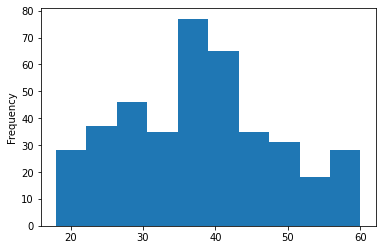

In [4]:
df["Age"].plot.hist()

<AxesSubplot:xlabel='Gender', ylabel='count'>

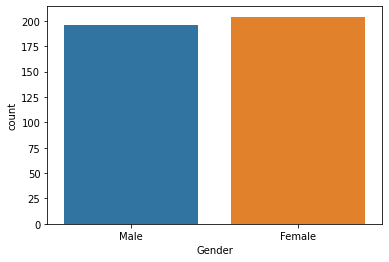

In [5]:
sns.countplot(x="Gender",data=df)

<AxesSubplot:ylabel='Frequency'>

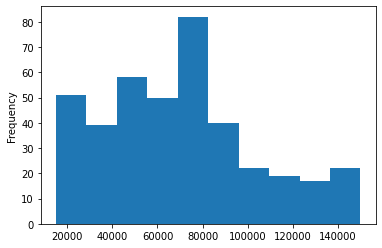

In [6]:
df["EstimatedSalary"].plot.hist()

<AxesSubplot:xlabel='Purchased', ylabel='count'>

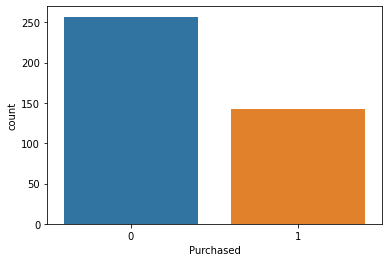

In [7]:
sns.countplot(x="Purchased",data=df)

In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.shape

(400, 5)

In [11]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:>

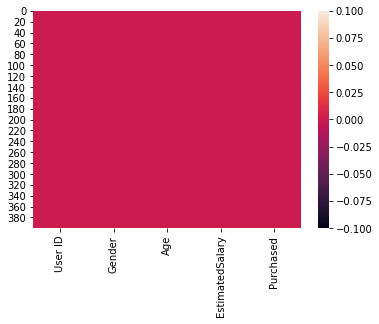

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
gender = pd.get_dummies(df["Gender"],drop_first=True)
gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [15]:
df = pd.concat([df,gender],axis=1)

In [16]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [17]:
df.drop(["User ID","Gender"],axis=1,inplace=True)

In [18]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## Data Training

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
X = df.drop(["Purchased","Male"],axis=1)
y = df["Purchased"]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1)

In [22]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [23]:
predictions = reg.predict(X_test)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.80      0.70       128
           1       0.30      0.15      0.20        72

    accuracy                           0.56       200
   macro avg       0.46      0.47      0.45       200
weighted avg       0.51      0.56      0.52       200



In [25]:
confusion_matrix(y_test,predictions)

array([[102,  26],
       [ 61,  11]], dtype=int64)

In [26]:
math.ceil(accuracy_score(y_test,predictions)*100)

57

## Model after Scaling

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
reg = LogisticRegression()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)
print(classification_report(y_test,predictions))
print("__________________________________________________________")
print(confusion_matrix(y_test,predictions))
print("__________________________________________________________")
print(math.ceil(accuracy_score(y_test,predictions)*100))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       128
           1       0.82      0.65      0.73        72

    accuracy                           0.82       200
   macro avg       0.82      0.79      0.80       200
weighted avg       0.82      0.82      0.82       200

__________________________________________________________
[[118  10]
 [ 25  47]]
__________________________________________________________
83
